<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🐈CATS OR DOGS🐶</p>

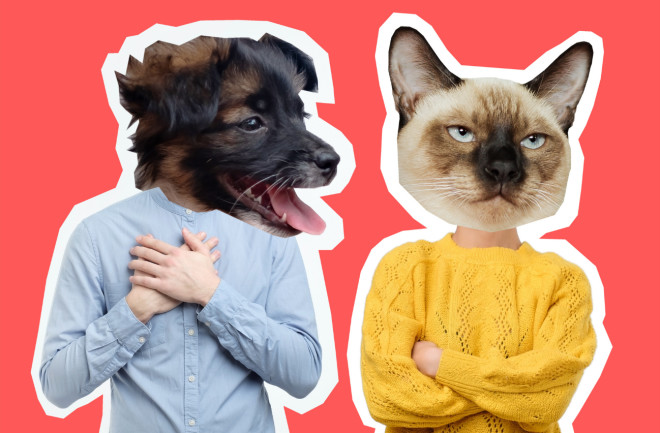

<a id="1"></a>

# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">by: CHNAIDA AYYOUB</p>

- 👨‍💻[Kaggle Profile](https://www.kaggle.com/ayoubchnaida)
- 💻[GitHub Profile](https://github.com/ayoubchnaida)
- 💼[LinkedIn Profile](https://www.linkedin.com/in/ayyoub-chnaida-133b02275/)

<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📚IMPORTING LIBRARIES📚</p>

**1.import libraries**

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, Activation,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🔧Data Preprocessing and visualization📉</p>

**2 - Locate the path where all the images are.**

In [35]:
my_data_dir = 'C:/Users/pc/Desktop/PROJECT deep learning ehtp/final_project-M7_Deep-Learning/final_project/data_cats_and_dogs'

**2.1 - Check that the following command returns ['train', 'validation']**


In [36]:
os.listdir(my_data_dir)

['train', 'validation']

**2.2 - Set the variables train_path and val_path.**

In [37]:
# train and test paths (\ for windows, / for mac)
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/validation/'

**2.3 - Print the number of images for each class (cats & dogs) in the train and validation**

In [38]:
print(len(os.listdir(train_path+'dogs')))
print(len(os.listdir(train_path+'cats')))
print(len(os.listdir(test_path+'dogs')))
print(len(os.listdir(test_path+'cats')))

1000
1000
500
500


**3.Analysis of Examples of Dogs and Cats Images:**


**3.1 - Choose a random "dog" image from the train_path.**


In [39]:
os.listdir(train_path+'/dogs')[15]

'dog.111.jpg'

In [40]:
dog_path = train_path+'/dogs'+'/dog.111.jpg'

**3.2 - Convert this image to a numpy array.**


In [41]:
dog_array=cv2.imread(dog_path)

**3.3 - Verify the dimensions of this image.**


In [42]:
dog_array.shape

(375, 499, 3)

**3.4 - Plot this image using 'imshow'.**


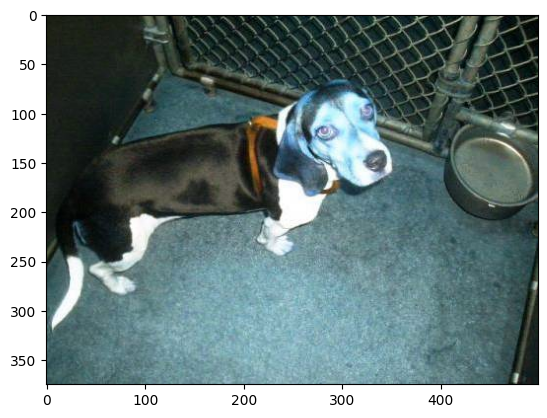

In [43]:
plt.imshow(dog_array)

**3.5 - Repeat the same process with a "cat" image from the train directory.**

In [44]:
os.listdir(train_path+'/cats')[74]

'cat.165.jpg'

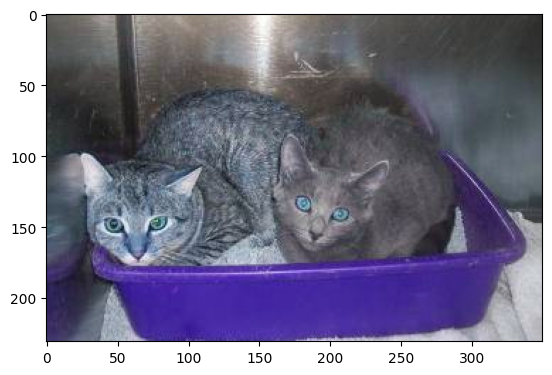

In [45]:
cat_path = train_path+'/cats'+'/cat.165.jpg'
cat_array=cv2.imread(cat_path)
plt.imshow(cat_array)

In [46]:
cat_array.shape

(231, 350, 3)

**dimension of  images**

In [47]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'/dogs'):
    
    img = cv2.imread(test_path+'/dogs'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

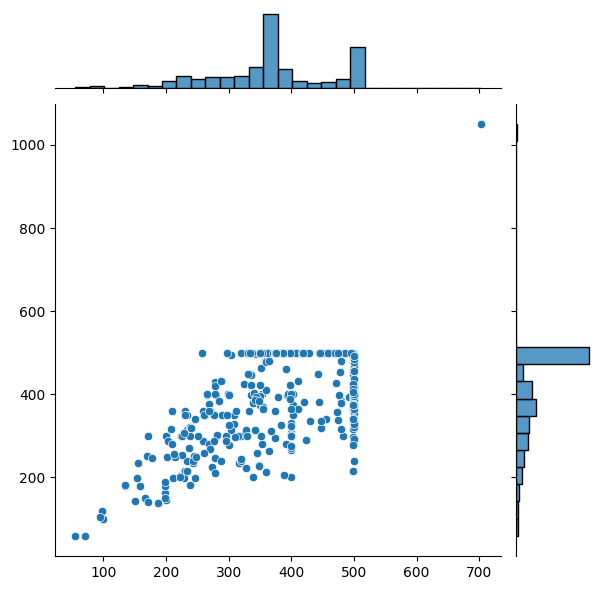

In [48]:
sns.jointplot(x = dim1,y = dim2)

In [49]:
print(np.mean(dim1))
print(np.mean(dim2))

367.576
406.22


In [50]:
image_shape = (350,400,3)

**4.Create an ImageDataGenerator for Preprocessing:**

In [51]:
image_generator = ImageDataGenerator(rescale=1/255)

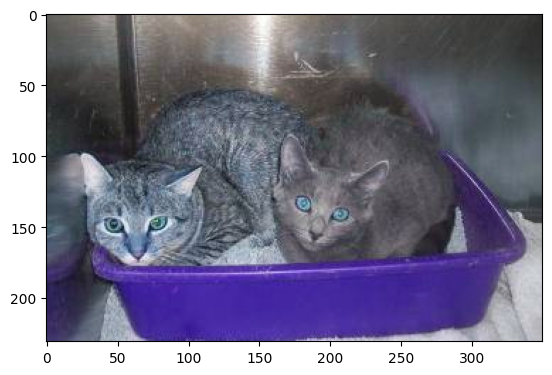

In [52]:
plt.imshow(image_generator.random_transform(cat_array))

<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🗳️build a CNN Model for Binary Classification⌛</p>

**5.build a CNN Model for Binary Classification:**

**5.1**

In [53]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 156800)           

**5.2 EarlyStopping**

In [55]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

**5.3 create data generators for the training and validation**

In [56]:
train_image_generator = image_generator.flow_from_directory(
    train_path,
    target_size=(300, 300),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary'
)

val_image_generator = image_generator.flow_from_directory(
    test_path,
    target_size=(300, 300),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary',
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


**5.4 training(train_image_generator and utiliser le EarlyStopping)**

In [57]:
results = model.fit_generator(
    train_image_generator,
    epochs=10,
    validation_data=val_image_generator,
    callbacks=[early_stop]
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
32/32 [==============================] - 115s 4s/step - loss: 1.1004 - accuracy: 0.5010 - val_loss: 0.6825 - val_accuracy: 0.5050
Epoch 2/10
32/32 [==============================] - 101s 3s/step - loss: 0.6567 - accuracy: 0.6095 - val_loss: 0.6259 - val_accuracy: 0.6710
Epoch 3/10
32/32 [==============================] - 101s 3s/step - loss: 0.5950 - accuracy: 0.6860 - val_loss: 0.5970 - val_accuracy: 0.6800
Epoch 4/10
32/32 [==============================] - 103s 3s/step - loss: 0.4862 - accuracy: 0.7770 - val_loss: 0.5711 - val_accuracy: 0.7040
Epoch 5/10
32/32 [==============================] - 105s 3s/step - loss: 0.4149 - accuracy: 0.8135 - val_loss: 0.6387 - val_accuracy: 0.6830
Epoch 6/10
32/32 [==============================] - 104s 3s/step - loss: 0.3322 - accuracy: 0.8560 - val_loss: 0.6954 - val_accuracy: 0.6930


In [58]:
from tensorflow.keras.models import save_model
model.save('dogs_cats_model0')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: dogs_cats_model0\assets


<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📈EVALUATION📊</p>

**8.1 dataframe (losses)**

In [59]:
losses=pd.DataFrame(model.history.history)

**8.2 Plot training and validation loss**

<Axes: >

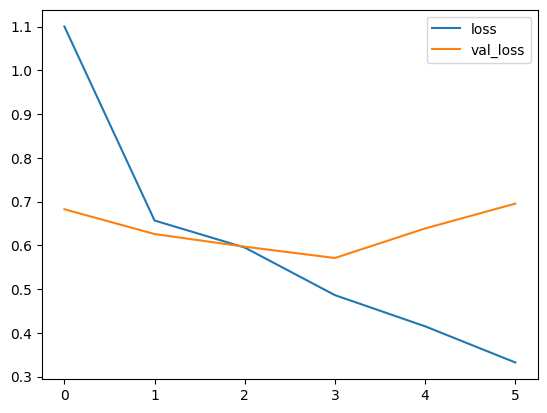

In [60]:
losses[['loss','val_loss']].plot()

**8.3 Calculate Probabilities for the Validation Image Generator:**

In [61]:
y_pred_proba = model.predict_generator(val_image_generator)

In [62]:
y_pred_proba

array([[1.74361974e-01],
       [4.50134128e-01],
       [1.88162297e-01],
       [2.08331585e-01],
       [6.71567023e-02],
       [6.64566755e-02],
       [9.71748233e-01],
       [2.23662674e-01],
       [1.47447348e-01],
       [1.59100205e-01],
       [4.41597432e-01],
       [5.23603261e-02],
       [3.48141313e-01],
       [3.15614939e-01],
       [8.54896963e-01],
       [2.09806859e-02],
       [2.51320243e-01],
       [2.65815437e-01],
       [3.29290926e-01],
       [4.73036110e-01],
       [3.95332873e-02],
       [2.17951238e-02],
       [2.79211074e-01],
       [6.96637571e-01],
       [1.03890359e-01],
       [2.96943486e-01],
       [1.57991141e-01],
       [7.56129265e-01],
       [6.21939480e-01],
       [3.18685442e-01],
       [1.69028848e-01],
       [1.46398336e-01],
       [3.43568265e-01],
       [4.65073168e-01],
       [1.76195562e-01],
       [1.85395479e-02],
       [3.70809734e-02],
       [2.01456934e-01],
       [9.69151855e-01],
       [9.42661166e-02],


**8.4 Transform Probabilities into Classes Using a Threshold of 0.5:**

In [63]:
y_pred_class = y_pred_proba > 0.5
y_pred_class

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [

**8.5 Retrieve the True Labels from the Validation Image Generator:**

In [64]:
y_test =val_image_generator.classes

In [65]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**8.6 Display the Classification Report and Confusion Matrix:**

In [66]:
# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred_class)

# Print the classification report and confusion matrix
classification_report_result = classification_report(y_test, y_pred_class)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67       500
           1       0.67      0.76      0.71       500

    accuracy                           0.69      1000
   macro avg       0.70      0.69      0.69      1000
weighted avg       0.70      0.69      0.69      1000

Confusion Matrix:
 [[315 185]
 [122 378]]


**8.7 Final Key Performance Indicator (KPI): What is the Model's Accuracy on the Test Data? Are You Satisfied with the Model's Performance?**

To calculate the accuracy on the test data, you can use a similar approach as in step 8.3 but with your test data:

In [67]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_class)

print("Accuracy on Test Data:", test_accuracy)

Accuracy on Test Data: 0.693


**9) Prédictions (Where the Model Made Mistakes)**

**9.1 Display Some Test Data Images Where the Model Made Mistakes:**

In [68]:
model0 = tf.keras.models.load_model('dogs_cats_model0')  
y_pred_proba = model0.predict_generator(val_image_generator)
y_pred_class = y_pred_proba > 0.5
y_test =val_image_generator.classes

In [69]:

list_test = list(y_test)
list_pred = list(y_pred_class)
list_pred = [int(i) for i in list_pred]
df = pd.DataFrame({'True': list_test, 'Predicted': list_pred})


misclassified_df = df[df['True'] != df['Predicted']]


misclassified_indices = misclassified_df.index.tolist()



In [73]:
misclassified_indices

[6,
 14,
 23,
 27,
 28,
 38,
 44,
 48,
 50,
 52,
 54,
 61,
 62,
 63,
 65,
 66,
 68,
 74,
 75,
 78,
 80,
 82,
 85,
 86,
 95,
 99,
 102,
 103,
 104,
 107,
 117,
 118,
 121,
 122,
 123,
 124,
 127,
 129,
 130,
 131,
 134,
 142,
 143,
 146,
 148,
 152,
 156,
 158,
 159,
 161,
 163,
 164,
 166,
 171,
 174,
 178,
 179,
 180,
 182,
 183,
 193,
 195,
 200,
 203,
 205,
 209,
 210,
 211,
 213,
 223,
 225,
 226,
 231,
 232,
 233,
 247,
 248,
 251,
 253,
 255,
 256,
 257,
 260,
 261,
 266,
 269,
 270,
 271,
 272,
 273,
 274,
 279,
 280,
 282,
 288,
 291,
 294,
 296,
 298,
 300,
 301,
 304,
 306,
 312,
 315,
 316,
 317,
 318,
 321,
 327,
 330,
 333,
 334,
 336,
 337,
 348,
 350,
 353,
 355,
 357,
 358,
 362,
 363,
 368,
 369,
 373,
 374,
 376,
 377,
 379,
 380,
 381,
 384,
 386,
 387,
 388,
 389,
 390,
 391,
 396,
 397,
 398,
 399,
 401,
 403,
 405,
 408,
 411,
 412,
 414,
 417,
 418,
 419,
 420,
 421,
 422,
 426,
 430,
 431,
 432,
 435,
 436,
 439,
 440,
 441,
 450,
 456,
 457,
 461,
 462,
 464,
 

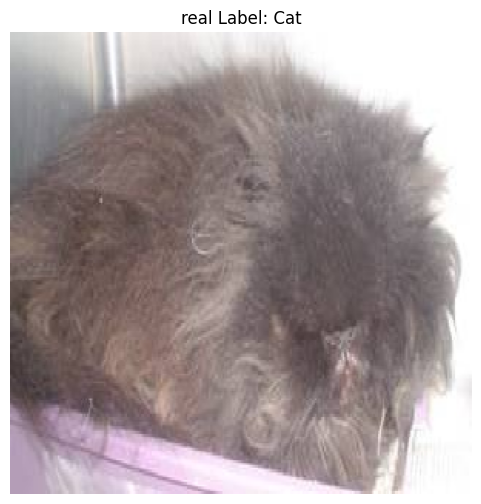

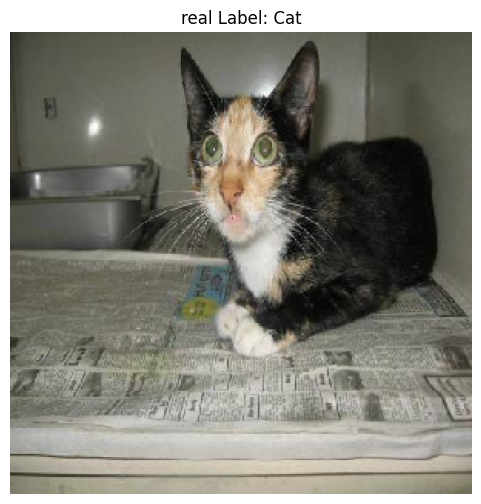

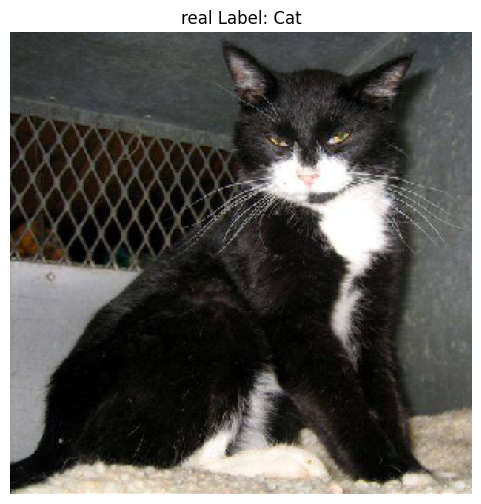

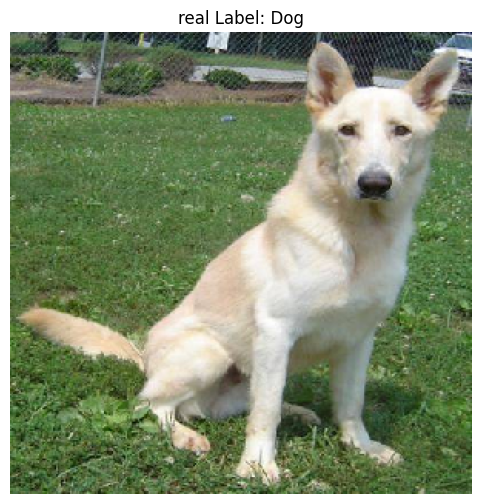

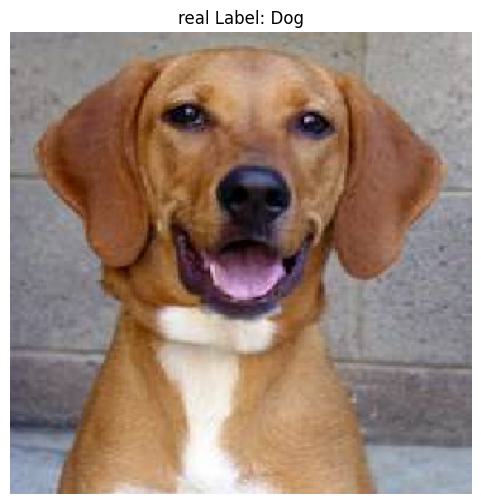

In [74]:

for i in misclassified_indices[:5]:
    x, y = val_image_generator.next()
    image_array = x[i]  # Take the first image from the batch
    label = "Dog" if y[i] == 1 else "Cat"  # Adjust this based on your class labels

    plt.figure(figsize=(6, 6))
    plt.imshow(image_array)
    plt.title(f"real Label: {label}")
    plt.axis('off')
    plt.show()

<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🔩Data augmentation🔩</p>

**10**

In [75]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40, 
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,  
    fill_mode='nearest'  
)

In [76]:
train_image_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(300, 300),
    color_mode='rgb',
    batch_size=64,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [77]:
results = model.fit_generator(
    train_image_generator,
    epochs=10,  
    validation_data=val_image_generator,
    callbacks=[early_stop]
)

Epoch 1/10
32/32 [==============================] - 104s 3s/step - loss: 0.6556 - accuracy: 0.6280 - val_loss: 0.5996 - val_accuracy: 0.6610
Epoch 2/10
32/32 [==============================] - 103s 3s/step - loss: 0.6038 - accuracy: 0.6530 - val_loss: 0.5890 - val_accuracy: 0.6680
Epoch 3/10
32/32 [==============================] - 104s 3s/step - loss: 0.5901 - accuracy: 0.6770 - val_loss: 0.5702 - val_accuracy: 0.6850
Epoch 4/10
32/32 [==============================] - 103s 3s/step - loss: 0.5882 - accuracy: 0.6860 - val_loss: 0.5697 - val_accuracy: 0.7150
Epoch 5/10
32/32 [==============================] - 105s 3s/step - loss: 0.5777 - accuracy: 0.6920 - val_loss: 0.5571 - val_accuracy: 0.7100
Epoch 6/10
32/32 [==============================] - 106s 3s/step - loss: 0.5794 - accuracy: 0.6820 - val_loss: 0.5868 - val_accuracy: 0.6770
Epoch 7/10
32/32 [==============================] - 110s 3s/step - loss: 0.5671 - accuracy: 0.6980 - val_loss: 0.5487 - val_accuracy: 0.7170
Epoch 8/10
32

In [78]:
from tensorflow.keras.models import save_model
model.save('dogs_cats_model00')

INFO:tensorflow:Assets written to: dogs_cats_model00\assets


In [79]:
model1 = tf.keras.models.load_model('dogs_cats_model00')  
y_pred_proba = model1.predict_generator(val_image_generator)
y_pred_class = y_pred_proba > 0.5
y_test =val_image_generator.classes
# Calculate the confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred_class)

# Print the classification report and confusion matrix
classification_report_result = classification_report(y_test, y_pred_class)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       500
           1       0.74      0.74      0.74       500

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000

Confusion Matrix:
 [[372 128]
 [130 370]]


<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📤Transfer learning📥</p>

**11**

VGG16 We'll use the VGG16 architecture as described in the paper Very Deep Convolutional Networks for Large-Scale Image Recognition by Karen Simonyan and Andrew Zisserman. We're using it because it has a relatively simple architecture and Keras ships with a model that has been pretrained on ImageNet.

Keras includes a number of additional pretrained networks if you want to try with a different one. You could also build the VGG16 network yourself, the code for the Keras implementation is here. It is just a number of Conv2D and MaxPooling2D layers with a dense network on top with a final softmax activation function.

In [80]:

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))


model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])



model.fit(train_image_generator, epochs=10, validation_data=val_image_generator)

Epoch 1/10
32/32 [==============================] - 386s 12s/step - loss: 0.6722 - accuracy: 0.6365 - val_loss: 0.4412 - val_accuracy: 0.8030
Epoch 2/10
32/32 [==============================] - 372s 12s/step - loss: 0.4647 - accuracy: 0.7845 - val_loss: 0.3114 - val_accuracy: 0.8860
Epoch 3/10
32/32 [==============================] - 478s 15s/step - loss: 0.3837 - accuracy: 0.8395 - val_loss: 0.2871 - val_accuracy: 0.8840
Epoch 4/10
32/32 [==============================] - 483s 15s/step - loss: 0.3688 - accuracy: 0.8400 - val_loss: 0.2747 - val_accuracy: 0.8810
Epoch 5/10
32/32 [==============================] - 499s 16s/step - loss: 0.3429 - accuracy: 0.8475 - val_loss: 0.2318 - val_accuracy: 0.9140
Epoch 6/10
32/32 [==============================] - 493s 15s/step - loss: 0.3199 - accuracy: 0.8625 - val_loss: 0.2125 - val_accuracy: 0.9230
Epoch 7/10
32/32 [==============================] - 541s 17s/step - loss: 0.3178 - accuracy: 0.8680 - val_loss: 0.2030 - val_accuracy: 0.9260
Epoch 

In [81]:

validation_results = model.evaluate(val_image_generator)


print("Validation Loss:", validation_results[0])
print("Validation Accuracy:", validation_results[1])

16/16 [==============================] - 133s 8s/step - loss: 0.1853 - accuracy: 0.9280
Validation Loss: 0.18534398078918457
Validation Accuracy: 0.9279999732971191


**save the model**

In [82]:
from tensorflow.keras.models import save_model
model.save('dogs_cats_model1')

INFO:tensorflow:Assets written to: dogs_cats_model1\assets


**evaluation**

In [83]:
y_pred_proba = model.predict_generator(val_image_generator)
y_pred_class = y_pred_proba > 0.5
y_test =val_image_generator.classes

confusion_matrix_result = confusion_matrix(y_test, y_pred_class)


classification_report_result = classification_report(y_test, y_pred_class)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       500
           1       0.93      0.92      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

Confusion Matrix:
 [[466  34]
 [ 38 462]]


**lets use this model to predict classe of new image**

In [84]:
from IPython.display import Image
image_url = 'https://www.alleycat.org/wp-content/uploads/2014/06/NewResources_PhotoBanners_1400x520-1024x520.jpg'
Image(url=image_url)

In [85]:
image_path = r'C:\Users\pc\Desktop\PROJECT deep learning ehtp\final_project-M7_Deep-Learning\final_project\image1.jpg'


image = cv2.imread(image_path)
image = cv2.resize(image, (300, 300))  
image = np.expand_dims(image, axis=0)  
import tensorflow as tf


model = tf.keras.models.load_model('dogs_cats_model1') 


predictions = model.predict(image)
y_pred_class = int(predictions > 0.5)

class_labels = os.listdir(test_path)  
predicted_label = class_labels[y_pred_class]
print(f"Predicted Class: {predicted_label}")

Predicted Class: cats


In [86]:
from IPython.display import Image
image_url = 'https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=0.752xw:1.00xh;0.175xw,0&resize=1200:*'
Image(url=image_url)

In [87]:
image_path = r'C:\Users\pc\Desktop\PROJECT deep learning ehtp\final_project-M7_Deep-Learning\final_project\image2.jpg'


image = cv2.imread(image_path)
image = cv2.resize(image, (300, 300))  
image = np.expand_dims(image, axis=0)  
import tensorflow as tf


model = tf.keras.models.load_model('dogs_cats_model1')  


predictions = model.predict(image)
y_pred_class = int(predictions > 0.5)

class_labels = os.listdir(test_path) 
predicted_label = class_labels[y_pred_class]
print(f"Predicted Class: {predicted_label}")

Predicted Class: dogs


<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> 🌍deployment 💡</p>

<a id="1"></a>
# <p style="background-color:#FF5733;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🏆FIN🎖️</p>